In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#注意
1.传参进入函数若在函数中改变参数参数会改变
2.@可以实现数组的矩阵乘法
3.实现特征映射的方法
4.我这里尝试了很多种不同的特征数量，这个版本应该过拟合了

SyntaxError: invalid syntax (<ipython-input-2-1097e0a0abcc>, line 2)

## 总结一下卡了好几天的代码的收获
1.如何画出两种点，这个有两种方法一个是先分开另一个是直接使用sns的函数

2.这里上面是非正则化版本的logistic回归下面是正则化版本的：所谓的正则化就是防止过拟合，那么正则化的lamda越大就力度越大。

3.对于正则化和非正则化主要区别在于代价函数和梯度下降函数

4.可以自己算出来代价函数还有梯度下降的函数然后直接使用scipy的optimize

5.scipy 的optimize 最好传入的是数组作为参数，这里还是没有十分明白，@ 可以实现数组的矩阵方式乘法

6.如何做特征工程



In [39]:
path = 'ex2data1.txt'
data = pd.read_csv(path,names=['exam1','exam2','outcome'])
data.head()

,exam1,exam2,outcome
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


[]

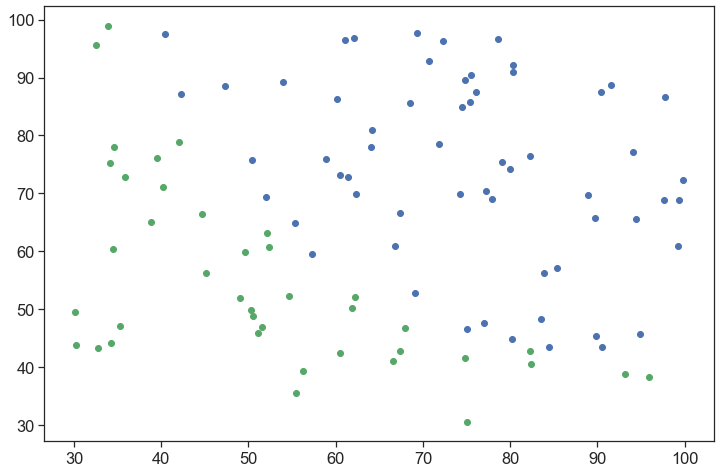

In [40]:
positive = data[data['outcome'].isin([1])]
negitive = data[data['outcome'].isin([0])]
fig,ax = plt.subplots(1,figsize=(12,8))
ax.scatter(positive['exam1'],positive['exam2'],c='b')
ax.scatter(negitive['exam1'],negitive['exam2'],c='g')
ax.plot()

In [41]:
data.insert(0,'ones',1)

In [42]:
def cost(theta, X, y):
    return np.mean(-y * np.log(sigmod(X @ theta)) - (1 - y) * np.log(1 - sigmod(X @ theta)))

In [43]:
def sigmod(z):
    return 1/(1+np.exp(-z))

In [44]:
theta=np.array([0,0,0])

In [45]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [46]:
X=np.array(X)
Y=np.array(Y.values)

In [47]:
X.shape,theta.shape,Y.shape

((100, 3), (3,), (100,))

In [48]:
cost(theta,X,Y)

0.6931471805599453

In [49]:
def gradient(theta,X,Y):
    theta = np.matrix(theta).T
    X = np.matrix(X)
    Y= np.matrix(Y).T
    return np.array(X.T*(sigmod(X*theta)-Y)/len(X)).ravel()

In [50]:
gradient(theta,X,Y)

array([ -0.1       , -12.00921659, -11.26284221])

In [51]:
from scipy import optimize

In [52]:
res = optimize.minimize(fun=cost,x0=theta,args=(X,Y),method='TNC',jac=gradient)

In [53]:
res

     fun: 0.20349770158947467
     jac: array([8.92139000e-09, 7.89044216e-08, 4.74611016e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.1613186 ,   0.20623159,   0.20147149])

In [54]:
def predicted(X,theta):
    temp = sigmod(X@theta)
    return (temp>=0.5).astype(int)

In [55]:
pred=predicted(X,res.x)

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(Y, pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



In [58]:
x = np.arange(130,step=0.1)
y = -res.x[0]/res.x[2]-(res.x[1]/res.x[2])*x


In [59]:
res.x[1]/res.x[2]

1.0236266797297773

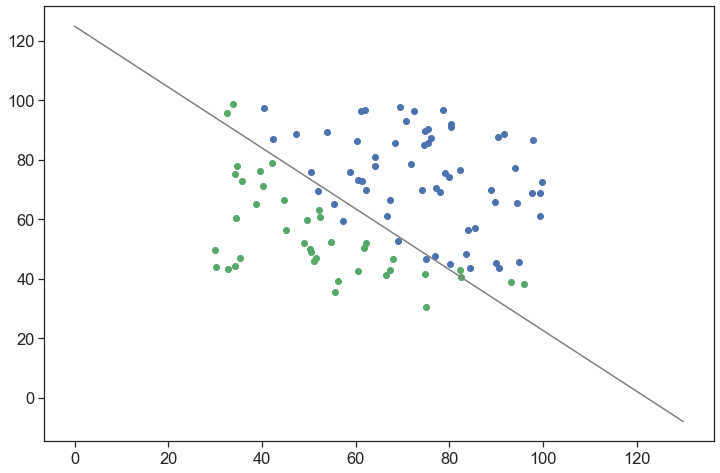

In [60]:
fig,ax2 = plt.subplots(1,figsize=(12,8))
ax2.plot(x,y,'grey')
ax2.scatter(positive['exam1'],positive['exam2'],c='b')
ax2.scatter(negitive['exam1'],negitive['exam2'],c='g')
plt.show()

In [61]:
path2 = 'ex2data2.txt'
data2 = pd.read_csv(path2,names = ['test1','test2','test3'])

In [62]:
data2.head()

,test1,test2,test3
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


C:\Users\zgc\anaconda3\envs\tfz\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\zgc\anaconda3\envs\tfz\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


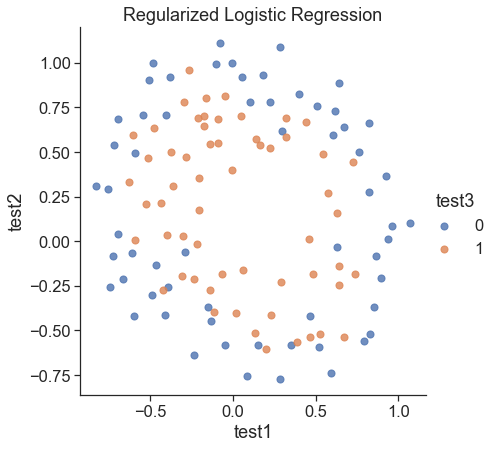

In [63]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('test1', 'test2', hue='test3', data=data2, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )

plt.title('Regularized Logistic Regression')
plt.show()

In [64]:
#接下来是特征工程，即特征映射


In [65]:
def feature_mapping(X,Y,power,data):
    for i in range(0,power+1):
        for j in range(0,i+1):
            data['f'+str(i)+str(j)] = np.power(X,i-j)*np.power(Y,j)
    return pd.DataFrame(data)

In [66]:
x1 = np.array(data2['test1'])
x2 = np.array(data2['test2'])

In [67]:
y=data2['test3']

In [68]:
data3 = feature_mapping(x1,x2,10,data2)
data3.head()

,test1,test2,test3,f00,f10,f11,f20,f21,f22,f30,...,f101,f102,f103,f104,f105,f106,f107,f108,f109,f1010
0,0.051267,0.69956,1,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,...,1.711457e-12,2.335356e-11,3.186693e-10,4.348378e-09,5.933547e-08,8.096577e-07,0.000011,0.000151,0.002057,0.028070
1,-0.092742,0.68494,1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,...,-3.476487e-10,2.567537e-09,-1.896238e-08,1.400454e-07,-1.034296e-06,7.638727e-06,-0.000056,0.000417,-0.003077,0.022726
2,-0.213710,0.69225,1,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,...,-6.437045e-07,2.085089e-06,-6.754027e-06,2.187766e-05,-7.086618e-05,2.295499e-04,-0.000744,0.002409,-0.007802,0.025271
3,-0.375000,0.50219,1,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,...,-7.364605e-05,9.862483e-05,-1.320757e-04,1.768723e-04,-2.368627e-04,3.172002e-04,-0.000425,0.000569,-0.000762,0.001020
4,-0.513250,0.46564,1,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,...,-1.150829e-03,1.044076e-03,-9.472259e-04,8.593595e-04,-7.796437e-04,7.073226e-04,-0.000642,0.000582,-0.000528,0.000479


In [69]:
data3=data3.iloc[:,3:]

In [70]:
data3.describe()

,f00,f10,f11,f20,f21,f22,f30,f31,f32,f33,...,f101,f102,f103,f104,f105,f106,f107,f108,f109,f1010
count,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000,...,1.180000e+02,1.180000e+02,1.180000e+02,1.180000e+02,1.180000e+02,1.180000e+02,1.180000e+02,1.180000e+02,1.180000e+02,1.180000e+02
mean,1.0,0.054779,0.183102,0.247575,-0.025472,0.301370,5.983333e-02,0.030682,0.015483,0.142350,...,1.666277e-03,5.318746e-03,1.034778e-04,3.040300e-03,6.883363e-05,3.728850e-03,-5.005615e-04,9.919896e-03,-3.464200e-03,1.020867e-01
std,0.0,0.496654,0.519743,0.248532,0.224075,0.284536,2.746459e-01,0.134706,0.150143,0.326134,...,3.270108e-02,1.401976e-02,1.037912e-02,8.199982e-03,8.999227e-03,1.086785e-02,1.787292e-02,3.239311e-02,8.460621e-02,3.722619e-01
min,1.0,-0.830070,-0.769740,0.000040,-0.484096,0.000026,-5.719317e-01,-0.358121,-0.483743,-0.456071,...,-9.629816e-02,4.154654e-19,-3.807164e-02,1.654413e-15,-2.658637e-02,2.233143e-15,-1.131167e-01,1.657812e-19,-4.812764e-01,1.230706e-23
25%,1.0,-0.372120,-0.254385,0.043243,-0.178209,0.061086,-5.155632e-02,-0.023672,-0.042980,-0.016492,...,-2.499491e-04,3.190712e-07,-1.292165e-04,4.926304e-07,-1.886999e-04,1.372054e-06,-3.813760e-04,1.261911e-06,-1.980744e-03,8.750001e-07
50%,1.0,-0.006336,0.213455,0.165397,-0.016521,0.252195,-2.544062e-07,0.006603,-0.000039,0.009734,...,-2.358636e-10,7.528015e-05,-7.169183e-09,3.952184e-05,-1.601372e-09,6.938687e-05,-4.489879e-09,2.349402e-04,-9.687178e-09,1.020189e-03
75%,1.0,0.478970,0.646563,0.389925,0.100795,0.464189,1.099616e-01,0.086392,0.079510,0.270310,...,1.990047e-05,2.657392e-03,1.300154e-05,1.488900e-03,1.040952e-05,1.535721e-03,1.705464e-05,3.727489e-03,2.585553e-05,2.162350e-02
max,1.0,1.070900,1.108900,1.146827,0.568307,1.229659,1.228137e+00,0.449251,0.505577,1.363569,...,1.855202e-01,9.266468e-02,7.463629e-02,6.011542e-02,5.928096e-02,8.255459e-02,1.149654e-01,2.333247e-01,6.089941e-01,2.811408e+00


In [71]:
def cost2(theta,X,Y,lamda):
    theta_1 = theta[1:]
    return cost(theta,X,Y) + lamda*np.sum(np.power(theta_1,2))/(2*len(X))

In [72]:
Theta = np.zeros(66)

In [73]:
y.shape
y=np.array(y)

In [74]:
data3 = np.array(data3)

In [75]:
Theta.shape

(66,)

In [76]:
cost2(Theta,data3,y,1)

0.6931471805599454

In [77]:
def r_gradient(theta,X,Y,lamda):
    theta_1 =theta[1:]
    r_term = np.concatenate([np.array([0]),theta_1/len(X)])
    return gradient(theta,X,Y) + lamda*r_term

In [78]:
r_gradient(Theta,data3,y,1)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02,
       1.99427086e-02, 2.74239681e-03, 2.32500787e-03, 2.21859968e-03,
       1.37054473e-03, 4.59059364e-03, 2.44887343e-03, 3.45775396e-02,
       2.58470812e-02, 9.24073316e-04, 3.56449986e-03, 2.36431492e-04,
       2.73345994e-03, 1.41372690e-04, 5.06220460e-03, 7.44299593e-04,
       3.91158180e-02, 1.94460178e-02, 2.03971305e-03, 1.67313910e-03,
       9.57374855e-04, 8.28510751e-04, 1.45754709e-03, 5.55440822e-04,
       3.80878101e-03, 1.42922173e-03, 3.74400380e-02, 2.27382094e-02,
      

In [79]:
lamda=0

In [80]:
res = optimize.minimize(fun = cost2,x0=Theta,args=(data3,y,lamda),method='Newton-CG',jac=r_gradient)

In [81]:
res

     fun: 0.21310123500496814
     jac: array([-1.07597957e-03, -1.93612314e-03,  5.42557096e-04, -1.29531611e-04,
        2.66534613e-04,  6.54455470e-04, -6.93764419e-04,  4.80052416e-04,
       -2.47835367e-04,  3.35373021e-04,  1.24520383e-04,  8.06017224e-05,
        1.53123960e-04, -1.98390573e-05,  5.85914620e-04, -1.91752812e-04,
        1.96698088e-04, -8.92110376e-05,  1.97864718e-04, -7.83977843e-05,
        3.01651320e-04,  1.86254151e-04,  1.47904729e-05,  8.43830928e-05,
       -8.02620694e-06,  1.13608538e-04, -4.40787385e-05,  4.50489403e-04,
       -1.91106143e-05,  7.65506938e-05, -4.12614016e-06,  6.78437848e-05,
       -3.19965294e-05,  1.11255500e-04, -4.17780458e-05,  2.78823611e-04,
        1.67673197e-04, -2.04499358e-05,  5.73321670e-05,  3.43831865e-06,
        4.21826786e-05, -2.16057979e-05,  8.93438080e-05, -5.12048533e-05,
        3.65517352e-04,  4.04630044e-05,  2.58366683e-05,  8.75991427e-06,
        2.38381439e-05,  4.13771038e-06,  3.62441810e-05, -3

In [82]:
final_theta = res.x
y_pred = predicted(data3,final_theta)

In [83]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1])

In [84]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        60
           1       0.86      0.97      0.91        58

    accuracy                           0.91       118
   macro avg       0.91      0.91      0.91       118
weighted avg       0.91      0.91      0.91       118

